# Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

# Classificação de Margem Suave

In [10]:
iris = load_iris()
X = iris["data"][:, (2, 3)] # Comprimento da Pétala, Largura da Pétala
y = (iris["target"] == 2).astype(np.float64) # Iris Virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("Linear_svc", LinearSVC(C= 1,
                             loss= "hinge"))
])
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Linear_svc', LinearSVC(C=1, loss='hinge'))])

In [11]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

# Classificação SVM Não Linear

In [13]:
X, y = make_moons(n_samples= 100,
                  noise= 0.15)
polinomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree= 3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C= 10,
                          loss= "hinge"))
])
polinomial_svm_clf.fit(X, y)

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


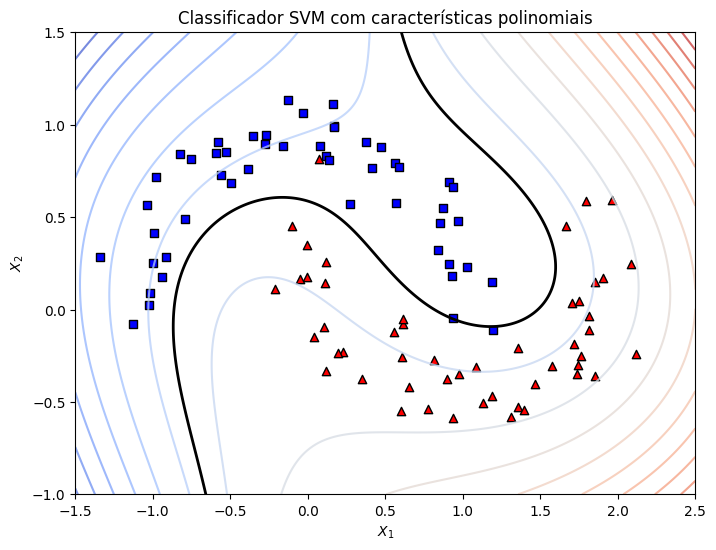

In [4]:
# Gerar dados
X, y = make_moons(n_samples= 100,
                  noise= 0.15)

# Contruir pipeline com características polinomiais, escalonamento e SVM linear
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree= 3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C= 10, loss= "hinge"))
])

# Treinar o modelo
polynomial_svm_clf.fit(X, y)

# Função para plotar as regiões de decisão
def plot_decision_boundary(clf, X, y):
    x0, x1 = np.meshgrid(
        np.linspace(-1.5, 2.5, 500).reshape(-1, 1),
        np.linspace(-1.0, 1.5, 500).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.decision_function(X_new).reshape(x0.shape)

    plt.figure(figsize= (8, 6))

    plt.contour(x0, 
                x1,
                y_pred,
                levels= np.linspace(y_pred.min(), y_pred.max(), 20),
                cmap= "coolwarm",
                alpha= 0.75)
    
    plt.contour(x0,
                x1,
                y_pred,
                levels= [0],
                linewidths= 2,
                colors= 'k')
    
    plt.scatter(X[y == 0][:, 0],
                X[y == 0][:, 1],
                color= "blue",
                marker= "s",
                edgecolors= "k",
                label= "Classe 0") # Quadrados azuis
    
    plt.scatter(X[y == 1][:, 0],
                X[y == 1][:, 1],
                color= "red",
                marker= "^",
                edgecolors= "k",
                label= "Classe 1") # Triângulos Vermelhos

    plt.xlabel(r"$X_1$")
    plt.ylabel(r"$X_2$")
    plt.title("Classificador SVM com características polinomiais")

    plt.show()

# Plotar a fronteira de decisão
plot_decision_boundary(polynomial_svm_clf, X, y)

# Kernel Polinomial